<a href="https://colab.research.google.com/github/mehtabr1212/PRODIGY_DS_02/blob/main/Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd

titanic_df = pd.read_csv('/content/titanic.csv')
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [109]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Step 1: Handling Missing Values

In [111]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [112]:
# Impute missing values for 'Age' column with median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' column with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to high number of missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

In [113]:
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Step 2: Exploring Data Distribution

In [114]:
print(titanic_df.describe())  # Summary statistics for numerical variables
print("\n")
print(titanic_df['SibSp'].value_counts())  # Distribution of Siblings and Spouses
print("\n")
print(titanic_df['Parch'].value_counts())  # Distribution of Parents and Childrens
print("\n")
print(titanic_df['Pclass'].value_counts())  # Distribution of passenger class

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: coun

#Step 3: Feature Engineering

In [115]:
# Creating a new feature: 'FamilySize' by combining 'SibSp' and 'Parch'

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

#Step 4: Correlation Analysis:

In [116]:
# Selecting only numeric columns for correlation analysis
numeric_columns = titanic_df.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.245619  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.096688   -0.245619  
SibSp        0.159651    0.890712  
Parch        0.216225    0.783111  
Fare         1.000000    0.217138  
FamilySiz

#Step 5: Visualizing Relationships

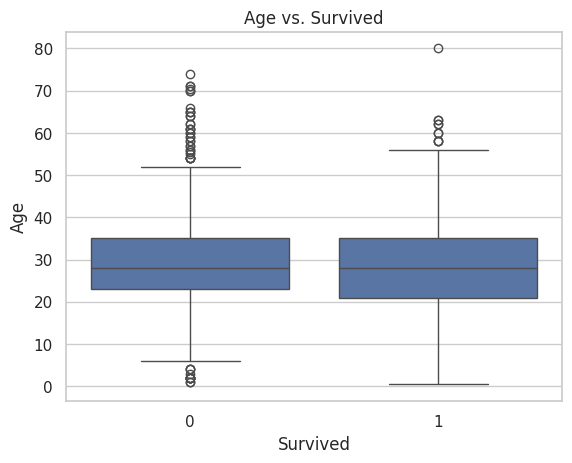

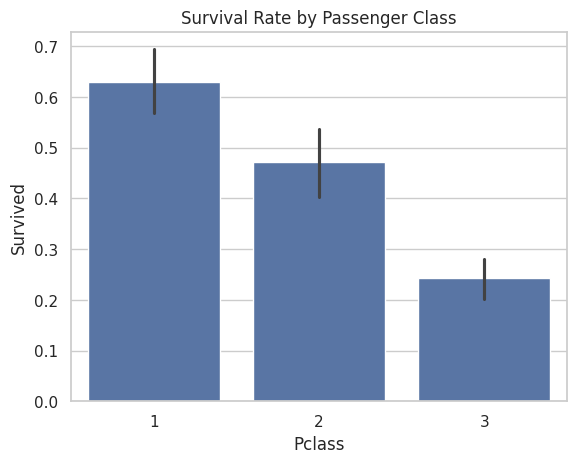

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between 'Age' and 'Survived'
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age vs. Survived')
plt.show()

# Relationship between 'Pclass' and 'Survived'
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

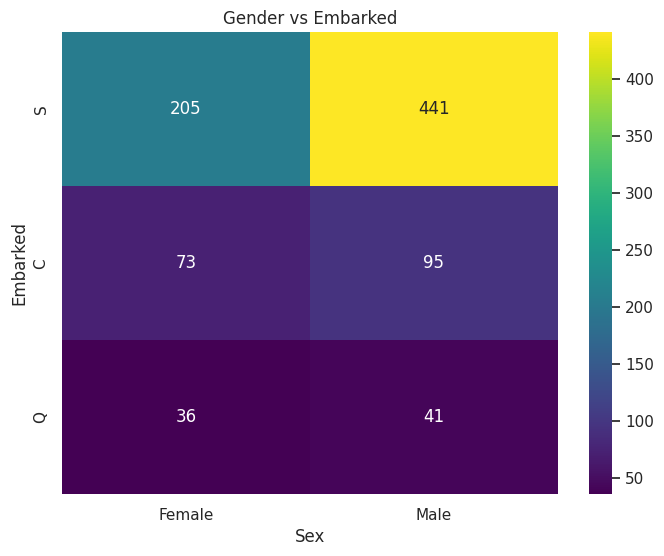

In [117]:
plt.figure(figsize=(8, 6))

# Creating a DataFrame for 2D histogram
df_2dhist = pd.DataFrame({
    'Female': titanic_df[titanic_df['Sex'] == 'female']['Embarked'].value_counts(),
    'Male': titanic_df[titanic_df['Sex'] == 'male']['Embarked'].value_counts()
})

# Ploting the heatmap
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Sex')
plt.ylabel('Embarked')
plt.title('Gender vs Embarked')
plt.show()

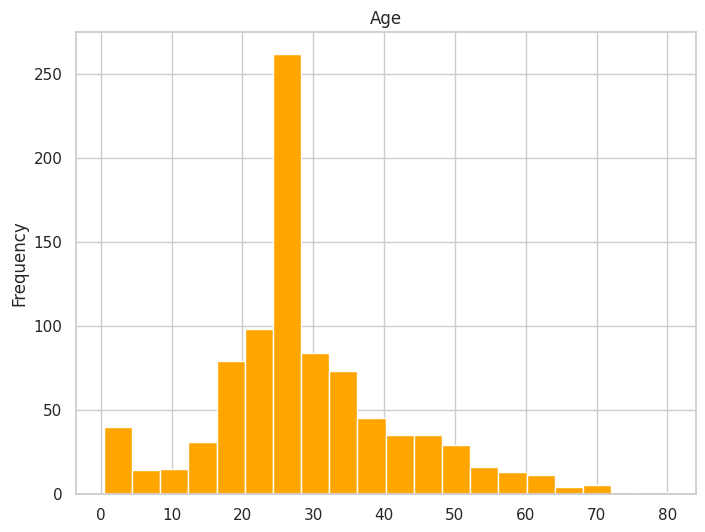

In [120]:
plt.figure(figsize=(8, 6))

# Histogram of age

titanic_df['Age'].plot(kind='hist', bins=20, title='Age', color='orange')
plt.show()

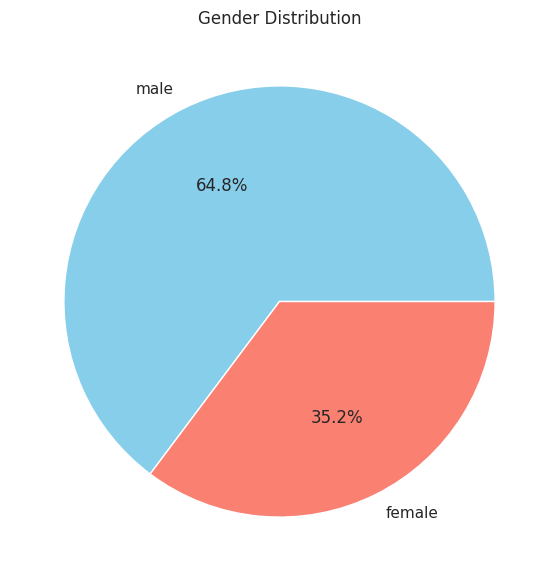

In [121]:
# Pie Chart for Gender Distribution
plt.figure(figsize=(7, 7))
gender_counts = titanic_df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.show()

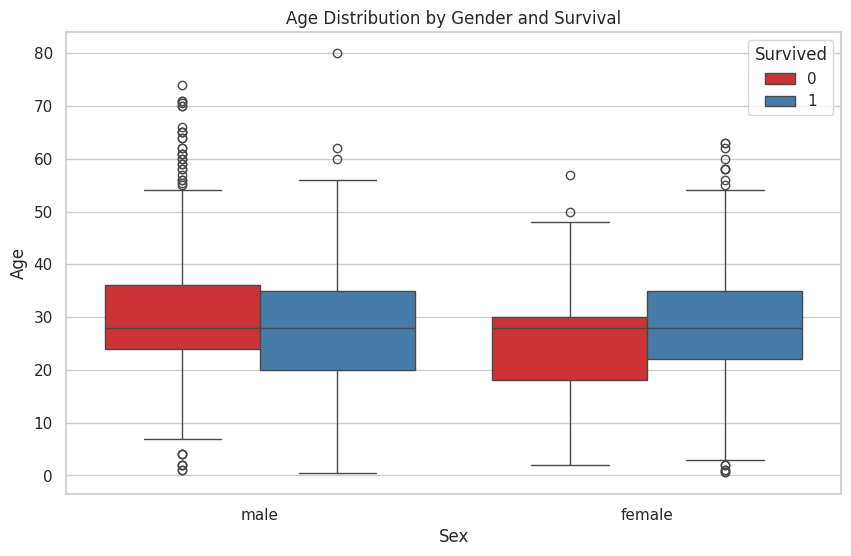

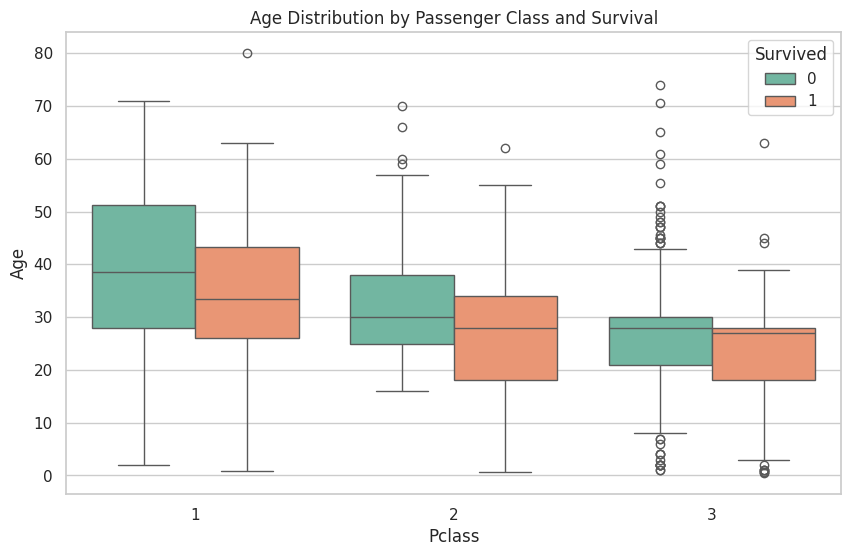

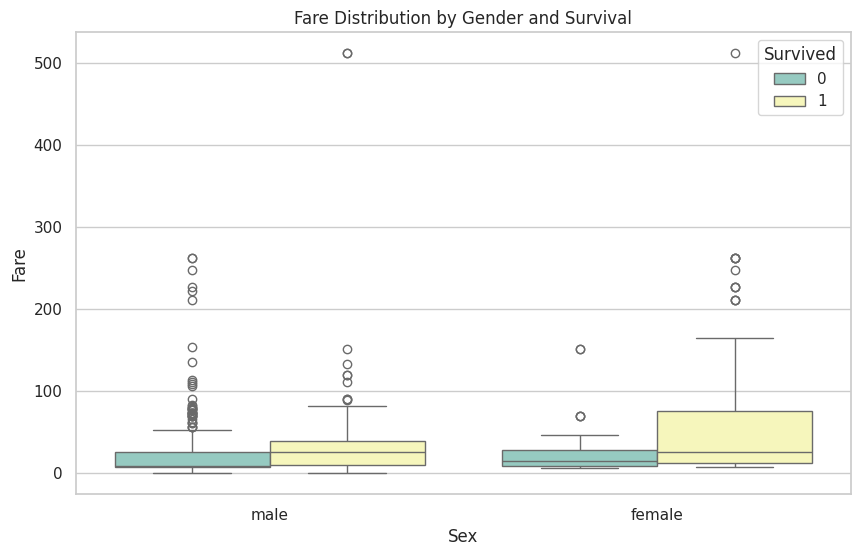

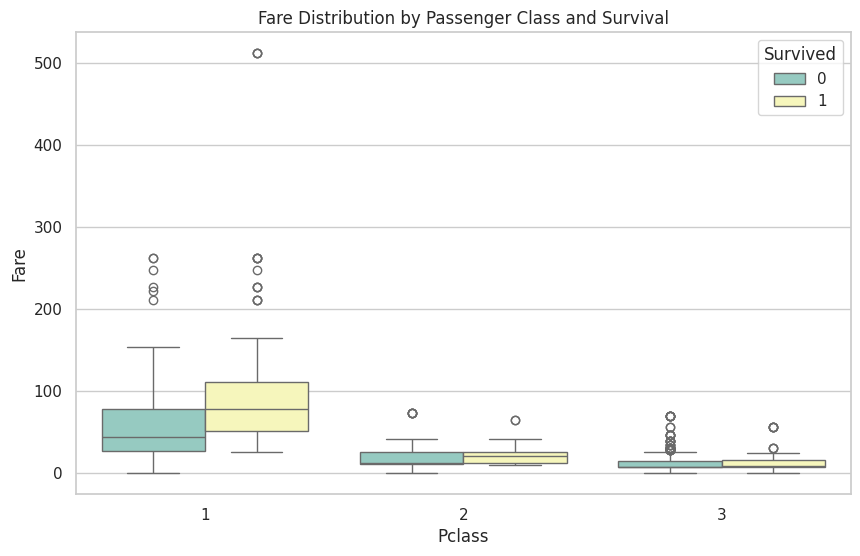

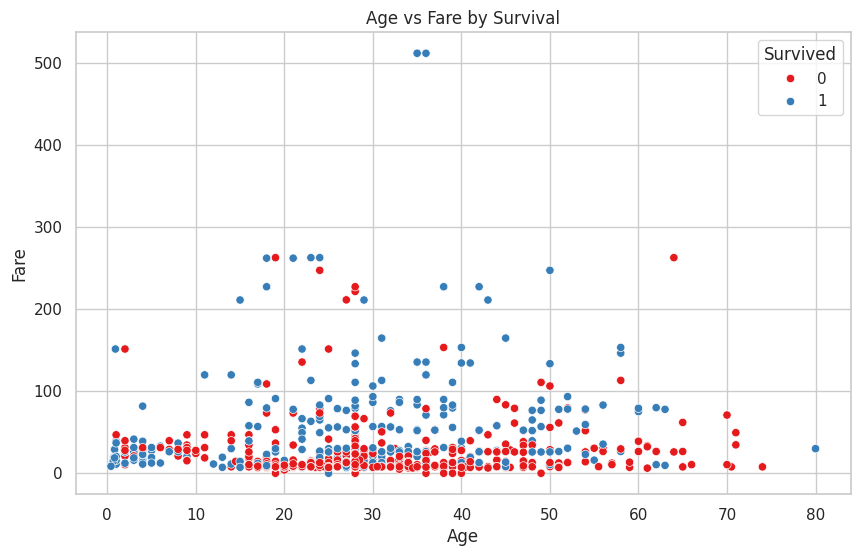

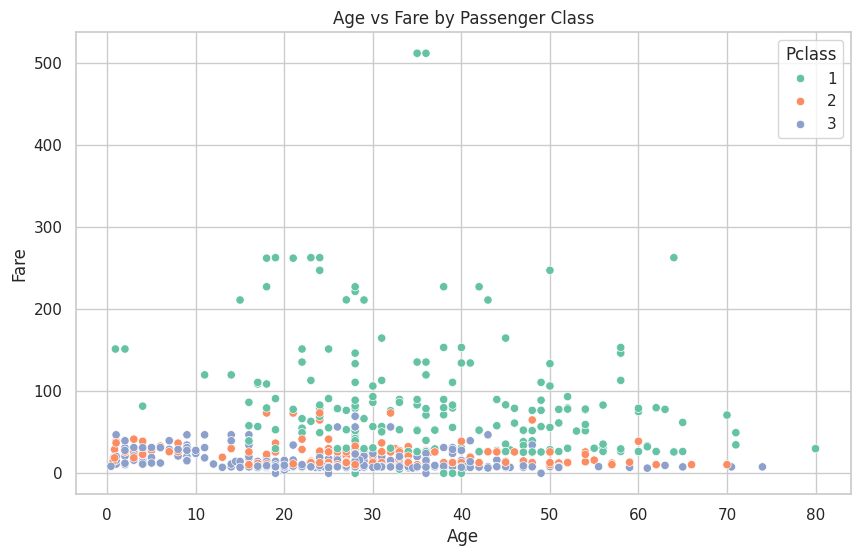

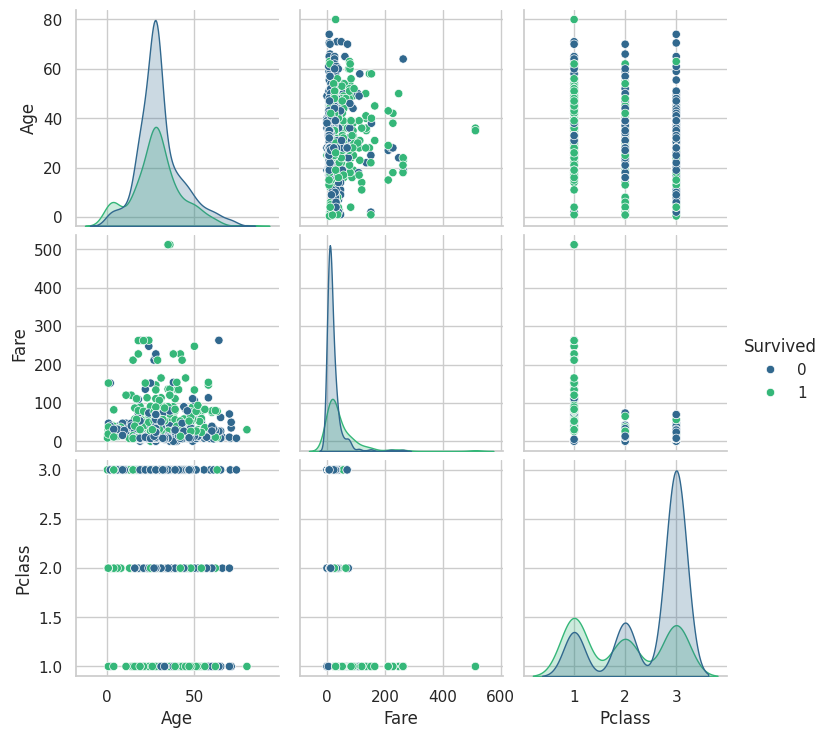

In [122]:
# Relationship between age, gender, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=titanic_df, palette='Set1')
plt.title('Age Distribution by Gender and Survival')
plt.show()

# Relationship between age, passenger class, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, palette='Set2')
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

# Relationship between fare, gender, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Fare', hue='Survived', data=titanic_df, palette='Set3')
plt.title('Fare Distribution by Gender and Survival')
plt.show()

# Relationship between fare, passenger class, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_df, palette='Set3')
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()

# Relationship between age, fare, and survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df, palette='Set1')
plt.title('Age vs Fare by Survival')
plt.show()

# Relationship between age, fare, and passenger class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=titanic_df, palette='Set2')
plt.title('Age vs Fare by Passenger Class')
plt.show()

# Pairplot for numerical variables
sns.pairplot(titanic_df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived', palette='viridis')
plt.show()

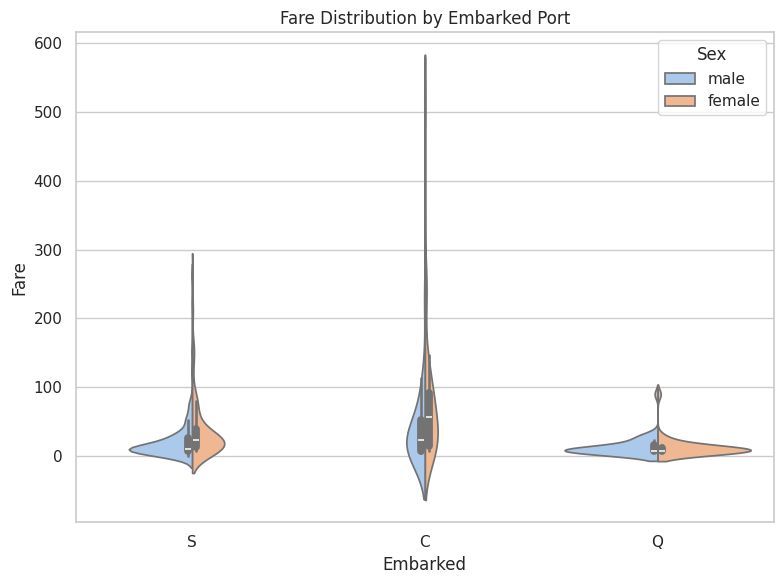

In [123]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Fare Distribution by Embarked Port
plt.figure(figsize=(8, 6))
sns.violinplot(x='Embarked', y='Fare', hue='Sex', data=titanic_df, palette='pastel', split=True)
plt.title('Fare Distribution by Embarked Port')

# Adjusting the layout
plt.tight_layout()

plt.show()